# DAA

## 1.Fibonacci

In [6]:
N = 10

def rec_fibonacci(N):
    
    if N <= 1:
        return N
    else:
        return rec_fibonacci(N-1) + rec_fibonacci(N-2)
    
def non_fibonacci(N):
    
    first = 0
    second = 1
    
    print(first, end = " ")
    print(second, end = " ")
    
    while N-2 > 0:
        third = first + second
        first = second
        second = third
        
        print(third, end = " ")
        N -= 1
        
#printing
print("Recursive: ")
for i in range(N):
    print(rec_fibonacci(i), end = " ")
    
print()
print("Non-recursive: ")
non_fibonacci(N)

Recursive: 
0 1 1 2 3 5 8 13 21 34 
Non-recursive: 
0 1 1 2 3 5 8 13 21 34 

## 2.Huffman

In [7]:
keys = ['A', 'B', 'C', 'D', 'E']
items = [5, 6, 6, 11, 20]
keys2 = list(keys)
encode = []
graph = {}

def huffman(keys, items):
    while len(items) > 1:
        #sorting
        data = list(zip(items, keys))
        data.sort(key = lambda x: x[0])
        items, keys = zip(*data)

        #merge
        new = items[0] + items[1]
        graph[new] = [keys[0], keys[1]]

        #updating
        items = list(items[2:])
        keys = list(keys[2:])
        items.append(new)
        keys.append(new)
    return new

def dfs(encode, graph, node, bit):
    if node in keys2:
        encode.append(bit)
        print(f"Encoding for {node}: {encode[1: ]}")
    else:
        encode.append(bit)
        if node in graph:
            bit = 1
            
            for neighbour in graph[node]:
                if bit == 1:
                    bit = 0
                else:
                    bit = 1
                dfs(encode.copy(), graph, neighbour, bit)

root = huffman(keys, items)
dfs(encode, graph, root, 1)

Encoding for E: [0]
Encoding for A: [1, 0, 0]
Encoding for B: [1, 0, 1]
Encoding for C: [1, 1, 0]
Encoding for D: [1, 1, 1]


## 3.Fractional Knapsack

In [2]:
data = [    
    #id Profit Weight
    [1, 10, 3],
    [2, 15, 3],
    [3, 10, 2],
    [4, 12, 5],
    [5, 8, 1]
]
size = len(data)


def sortIt(sortIdx, compIdx, size):
    for i in range(size - 1):
        for j in range(i+1, size):
            if data[i][sortIdx] < data[j][sortIdx]:
                data[i], data[j] = data[j], data[i]
            elif((data[i][sortIdx] == data[j][sortIdx]) & (data[i][compIdx] > data[j][compIdx])):
                data[i], data[j] = data[j], data[i]
                
def knapsack(weight, profit):
    idx = 0
    while weight < max:
        if weight + data[idx][2] <= max:
            weight += data[idx][2]
            profit += data[idx][1]
            items.append(data[idx][0])
        else:
            remain = max - weight
            profit += data[idx][1]*(remain/data[idx][2])
            weight += remain
            items.append(data[idx][0])
            
        idx += 1
        
    print("Weight: ", weight)
    print("Profit: ", profit)
    print("item sequence: ", items)
    
profit = 0
weight = 0
items = []
max = 10
idx = 0

sortIt(1, 2, size)
knapsack(weight, profit)


Weight:  10
Profit:  37
item sequence:  [2, 4, 3]


In [4]:
W = 50
items = [(120, 30, 'A'), (100, 20, 'B'), (60, 10, 'C')]

def FKS(W, items):
    
    #sorting
    items.sort(key = lambda x: x[0] / x[1], reverse = True)
    
    maxProfit = 0.0
    seq = []
    
    for item in items:
        profit, weight, idx = item
        
        if weight <= W:
            W -= weight
            maxProfit += profit
            seq.append(idx)
        else:
            maxProfit += profit * (W/weight)
            seq.append(idx)
            break
            
    return maxProfit, seq

print(FKS(W, items))
    

(240.0, ['C', 'B', 'A'])


## 5. N-QUEENS

In [3]:
N = 8

def printSolution(board):
    for i in range(N):
        for j in range(N):
            print(board[i][j], end = " ")
        print()

def isSafe(board, row, col):
    
    #right horizontal check
    for i in range(N):
        if board[row][i] == 1:
            return False
        
    #left Upper diagonal check
    for i,j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False
        
    #Right Lower diagonal check
    for i,j in zip(range(row, N, 1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False
        
    return True
            
def solveNQUtil(board, col):
    
    if col >= N:
        return True
    
    for i in range(N):
        if isSafe(board, i, col):
            board[i][col] = 1
            
            if solveNQUtil(board, col + 1):
                return True
            
            board[i][col] = 0
            
    return False

def solveNQ():
    
    board = [[0 for i in range(N)] for j in range(N)]
    
    if (solveNQUtil(board, 0) == False):
        print("NO SOLUTION FOUND")
        return False
    
    printSolution(board)
    return True

solveNQ()

1 0 0 0 0 0 0 0 
0 0 0 0 0 0 1 0 
0 0 0 0 1 0 0 0 
0 0 0 0 0 0 0 1 
0 1 0 0 0 0 0 0 
0 0 0 1 0 0 0 0 
0 0 0 0 0 1 0 0 
0 0 1 0 0 0 0 0 


True

# ML

## 1.UBER LR, RF

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\SANKET\Downloads\archive (1)\uber.csv")

In [4]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [8]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
df.drop(labels = "Unnamed: 0", inplace = True, axis = 1)
df.drop(labels = "key", inplace = True, axis = 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_datetime    199999 non-null  object 
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [13]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [14]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [15]:
#splitting pickup_datetime
import calendar
df['day'] = df['pickup_datetime'].apply(lambda x: x.day)
df['hour'] = df['pickup_datetime'].apply(lambda x: x.hour)
df['month'] = df['pickup_datetime'].apply(lambda x: x.month)
df['year'] = df['pickup_datetime'].apply(lambda x: x.year)
df['weekday'] = df['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])
df.drop(labels = 'pickup_datetime', inplace = True, axis = 1)

In [16]:
df.weekday = df.weekday.map({'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6})

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
 6   day                199999 non-null  int32  
 7   hour               199999 non-null  int32  
 8   month              199999 non-null  int32  
 9   year               199999 non-null  int32  
 10  weekday            199999 non-null  int64  
dtypes: float64(5), int32(4), int64(2)
memory usage: 15.3 MB


In [18]:
#identify outliers
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    
    outliers = df[(df < q1 -1.5*IQR) | (df > q3 +1.5*IQR)]
    return outliers

In [19]:
outliers = find_outliers_IQR(df['fare_amount'])
print(outliers.max())
print(outliers.min())
print(len(outliers))

499.0
-52.0
17166


In [20]:
#calculating distance between dropoff and pickup coordinates
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    long1, lati1, long2, lati2 = map(np.radians, [longitude1, latitude1, longitude2, latitude2])
    dist_long = long2 - long1
    dist_lati = lati2 - lati1
    
    a = np.sin(dist_lati/2)**2 + np.cos(lati1) * np.cos(lati2) * np.sin(dist_long/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) * 6371
    
    return c

In [21]:
df['Distance'] = distance_transform(
    df['pickup_longitude'],
    df['pickup_latitude'],
    df['dropoff_longitude'],
    df['dropoff_latitude'],
)

In [22]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,19,5,2015,4,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,20,7,2009,5,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,21,8,2009,1,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,8,6,2009,5,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,17,8,2014,4,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,28,10,10,2012,0,0.112210
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,14,1,3,2014,5,1.875050
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,29,0,6,2009,1,12.850319
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,20,14,5,2015,3,3.539715


In [23]:
df.drop(df[df['Distance'] >= 60].index, inplace = True)
df.drop(df[df['fare_amount'] <= 0].index, inplace = True)
df.drop(df[(df['fare_amount'] > 100) & (df['Distance'] < 1)].index, inplace = True)
df.drop(df[(df['fare_amount'] < 100) & (df['Distance'] > 100)].index, inplace = True)

In [25]:
x = df['Distance'].values.reshape(-1, 1)
y = df['fare_amount'].values.reshape(-1, 1)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [27]:
#splitting dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(x_test)
new_df = pd.DataFrame()
new_df[['Actual']] = y_test
new_df[['Predicted']] = y_pred
new_df

,Actual,Predicted
0,-0.335740,-0.491059
1,-0.377386,-0.346590
2,0.486764,-0.139893
3,4.005830,3.979417
4,-0.793843,-0.598055
...,...,...
49857,-0.085865,0.383812
49858,-0.627260,-0.477263
49859,2.569051,2.466028
49860,-0.335740,0.094914


In [30]:
from sklearn.ensemble import RandomForestRegressor
y_train = np.ravel(y_train)
random = RandomForestRegressor(n_estimators =100, random_state = 10)
random.fit(x_train, y_train)

RandomForestRegressor(random_state=10)

In [31]:
y_pred = random.predict(x_test)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.3235143642460069
0.6817208800575796


## 2.EMAILS KNN, SVM

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\SANKET\Downloads\archive (1)\emails.csv")

In [3]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [5]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [6]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [9]:
#input data
x = df.drop(['Email No.', 'Prediction'], axis = 1)

#output data
y = df['Prediction']

In [10]:
x

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [11]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [16]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [17]:
x_scaled.shape

(5172, 3000)

In [18]:
#splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 0)

In [20]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [21]:
y_pred = knn.predict(x_test)

In [22]:
y_test

3324    0
15      0
4950    0
3964    1
2315    0
       ..
3551    0
1118    1
2239    0
1511    0
1240    1
Name: Prediction, Length: 1293, dtype: int64

In [23]:
y_pred

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [ ]:
error = []
for k in range(1, 41):
    knn = KNeighborsClassifer(n_neighbors = k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error.append(np.mean(pred != y_test))
    
error

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       929
           1       0.70      0.95      0.81       364

    accuracy                           0.87      1293
   macro avg       0.84      0.89      0.85      1293
weighted avg       0.90      0.87      0.88      1293



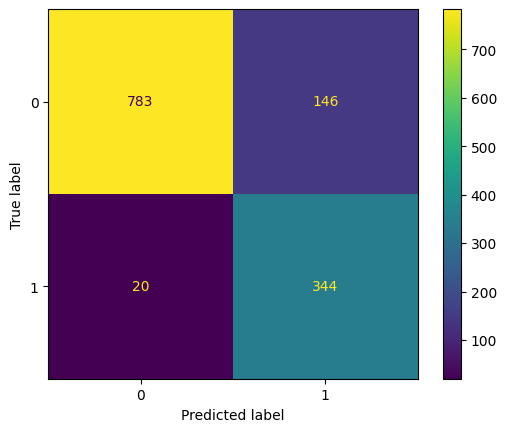

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(classification_report(y_test, y_pred))

In [25]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear') #'poly', 'rbf', 'linear', 'sigmoid'
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       929
           1       0.95      0.97      0.96       364

    accuracy                           0.98      1293
   macro avg       0.97      0.97      0.97      1293
weighted avg       0.98      0.98      0.98      1293



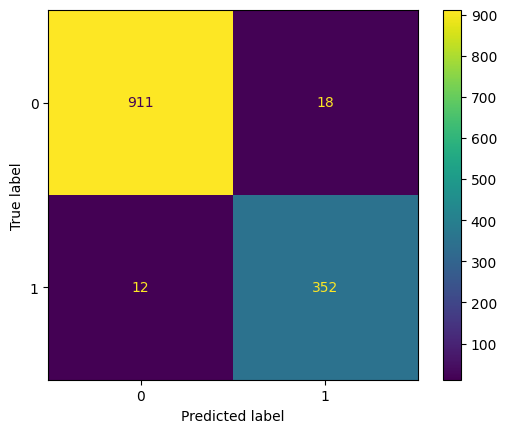

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(classification_report(y_test, y_pred))

## 3.EMPLOYEE CHURN Neural Network "ANN"

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\SANKET\Downloads\archive (1)\churn.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:

df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
#input data
x = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

#output data
y = df['Exited']

In [13]:
x


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [14]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [15]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [16]:
x.shape

(10000, 8)

In [17]:
x_scaled.shape

(10000, 8)

In [19]:
#splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 0)

In [20]:
x_train.shape

(7500, 8)

In [21]:
x_test.shape

(2500, 8)

In [23]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes = (100, 100, 100), random_state = 0, max_iter = 100, activation = "relu")
ann.fit(x_train, y_train)

C:\Users\SANKET\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [24]:
y_pred = ann.predict(x_test)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1991
           1       0.59      0.45      0.51       509

    accuracy                           0.82      2500
   macro avg       0.73      0.68      0.70      2500
weighted avg       0.81      0.82      0.81      2500



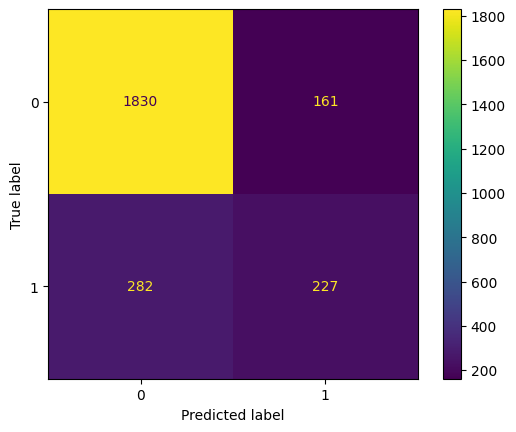

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(classification_report(y_test, y_pred))

In [27]:
## improvement imbalanced classification cuz of low entries in one set which causes less accuracy

In [28]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)
x_yes, y_ros = ros.fit_resample(x, y)

ModuleNotFoundError: No module named 'imblearn'

## 4.GRADIENT DESCENT

In [1]:
current_x = 2
iters = 0
max_iters = 10000
precision = 0.000001
lr = 0.01
previous_step_size = 1

In [2]:
def slope(x):
    return 2*(x+3)

def value_y(x):
    return (x+3)**2

x = []
y = []
x.append(current_x)
y.append(value_y(current_x))

In [3]:
while precision < previous_step_size and iters < max_iters:
    previous_x = current_x
    current_x = previous_x - lr * value_y(current_x)
    x.append(current_x)
    y.append(value_y(current_x))
    previous_step_size = abs(previous_x - current_x)
    print("Iteration : ", iters + 1, "Value: ", current_x)
    iters += 1

Iteration :  1 Value:  1.75
Iteration :  2 Value:  1.524375
Iteration :  3 Value:  1.31967530859375
Iteration :  4 Value:  1.133079360877005
Iteration :  5 Value:  0.9622559108439301
Iteration :  6 Value:  0.8052611918137536
Iteration :  7 Value:  0.6604610644345152
Iteration :  8 Value:  0.5264713123921045
Iteration :  9 Value:  0.4021113132208596
Iteration :  10 Value:  0.28636769934540596
Iteration :  11 Value:  0.1783655727923978
Iteration :  12 Value:  0.07734549564927831
Iteration :  13 Value:  -0.017355057346650715
Iteration :  14 Value:  -0.10631676588600673
Iteration :  15 Value:  -0.19005079247993095
Iteration :  16 Value:  -0.26900893796835756
Iteration :  17 Value:  -0.34359205977732477
Iteration :  18 Value:  -0.41415709122610556
Iteration :  19 Value:  -0.4810229267146679
Iteration :  20 Value:  -0.5444753816720392
Iteration :  21 Value:  -0.604771393184186
Iteration :  22 Value:  -0.6621425939732744
Iteration :  23 Value:  -0.7167983664824145
Iteration :  24 Value:  -0.7

In [4]:
print("Local Minima: ", current_x)

Local Minima:  -2.990001240409911


In [8]:
import matplotlib.pyplot as plt
import numpy as np

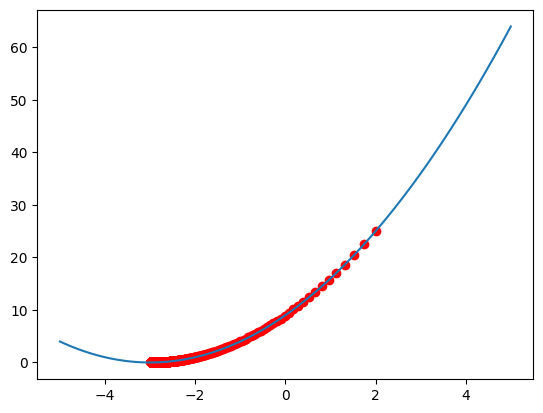

In [9]:
x_coordinate = np.linspace(-5, 5, 100)
plt.plot(x_coordinate, value_y(x_coordinate))
plt.scatter(x, y, color='red')
plt.xlabel = "x-values"
plt.ylabel = "function_values"
plt.show()

## 5.DIABETES KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\SANKET\Downloads\archive (1)\diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [8]:
#input data
x = df.drop(labels= 'Outcome', axis = 1)

#output data
y = df['Outcome']

In [9]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

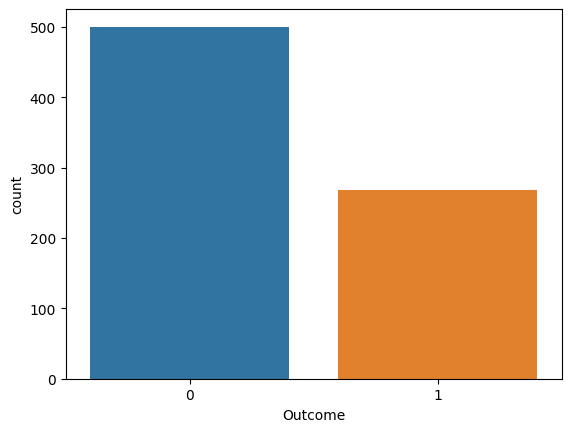

In [16]:
sns.countplot(x = y)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 0)

In [13]:
x_scaled.shape

(768, 8)

In [14]:
x_train.shape

(576, 8)

In [15]:
x_test.shape

(192, 8)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn.predict(x_test)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       130
           1       0.66      0.50      0.57        62

    accuracy                           0.76       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.75      0.76      0.75       192



In [20]:
error = []
for k in range(1,41):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    
    error.append(np.mean(pred != y_test))
    
error

[0.328125,
 0.2708333333333333,
 0.24479166666666666,
 0.2708333333333333,
 0.24479166666666666,
 0.2552083333333333,
 0.234375,
 0.24479166666666666,
 0.21875,
 0.24479166666666666,
 0.22916666666666666,
 0.22916666666666666,
 0.22395833333333334,
 0.234375,
 0.23958333333333334,
 0.21875,
 0.21354166666666666,
 0.22916666666666666,
 0.22916666666666666,
 0.22395833333333334,
 0.21875,
 0.22395833333333334,
 0.22395833333333334,
 0.22916666666666666,
 0.234375,
 0.22916666666666666,
 0.22395833333333334,
 0.21875,
 0.22395833333333334,
 0.21354166666666666,
 0.22395833333333334,
 0.22916666666666666,
 0.20833333333333334,
 0.22916666666666666,
 0.22916666666666666,
 0.234375,
 0.22395833333333334,
 0.22916666666666666,
 0.22395833333333334,
 0.22395833333333334]

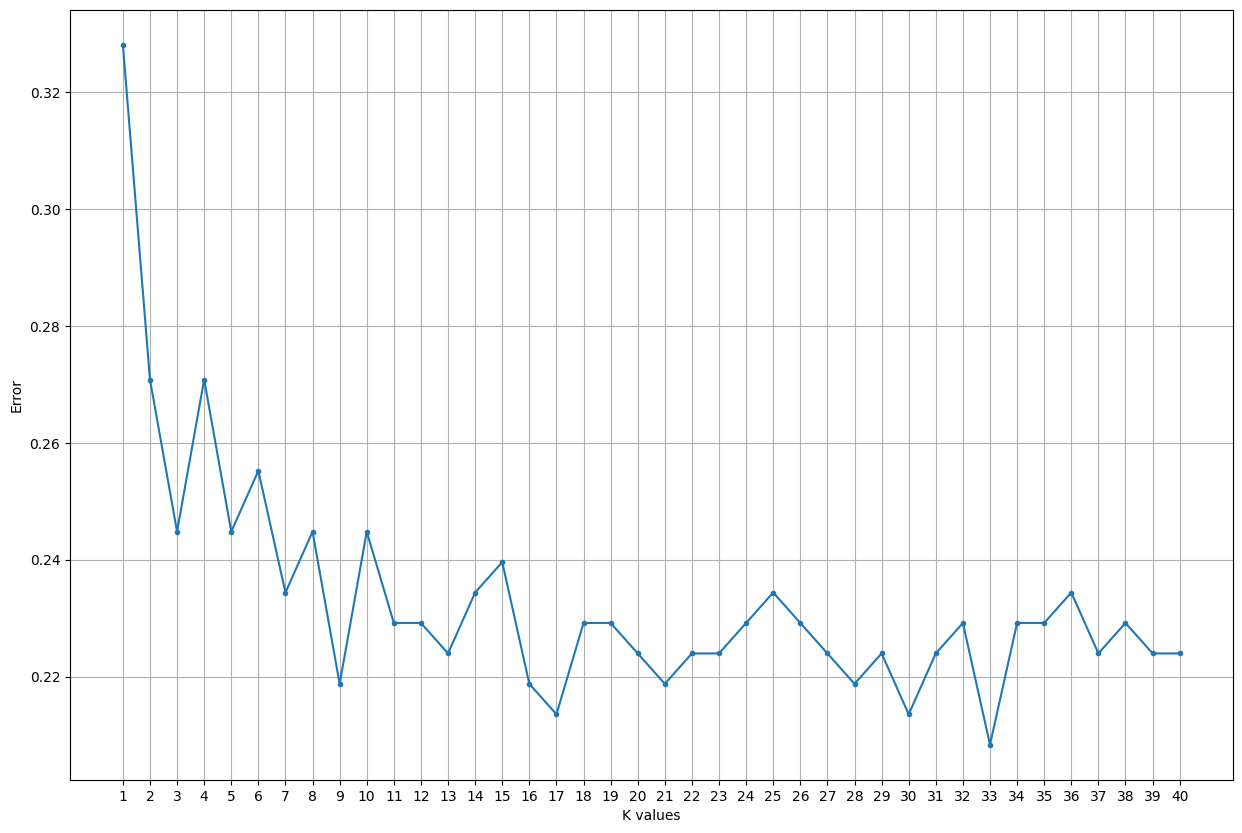

In [26]:
plt.figure(figsize= (15, 10))
plt.grid()
plt.xlabel("K values")
plt.ylabel("Error")
plt.xticks(range(1, 41))
plt.plot(range(1,41), error, marker = '.')

In [27]:
knn = KNeighborsClassifier(n_neighbors = 33)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       130
           1       0.79      0.48      0.60        62

    accuracy                           0.79       192
   macro avg       0.79      0.71      0.73       192
weighted avg       0.79      0.79      0.78       192

